In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import linregress

In [53]:
taxes_df_path = r"C:\Users\natal\OneDrive\Desktop\project_1_files\TAXES2.csv"
local_df_path = r"C:\Users\natal\OneDrive\Desktop\project_1_files\merged_farmers_markets.csv"
stores_df_path = r"C:\Users\natal\OneDrive\Desktop\project_1_files\STORES.csv"

In [54]:
stores_df = pd.read_csv(stores_df_path)
stores_df.head()

,FIPS,State,County,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,...,PCH_SNAPS_12_17,SNAPSPTH12,SNAPSPTH17,PCH_SNAPSPTH_12_17,WICS11,WICS16,PCH_WICS_11_16,WICSPTH11,WICSPTH16,PCH_WICSPTH_11_16
0,1001,AL,Autauga,5,3,-40.000000,0.090581,0.054271,-40.085748,1,...,19.376392,0.674004,0.804747,19.397900,5.0,5.0,0.000000,0.090567,0.090511,-0.061543
1,1003,AL,Baldwin,27,29,7.407407,0.144746,0.139753,-3.449328,6,...,36.927711,0.725055,0.890836,22.864524,26.0,28.0,7.692307,0.139380,0.134802,-3.284727
2,1005,AL,Barbour,6,4,-33.333333,0.219370,0.155195,-29.254287,0,...,3.349282,1.280590,1.424614,11.246689,7.0,6.0,-14.285714,0.255942,0.232387,-9.203081
3,1007,AL,Bibb,6,5,-16.666667,0.263794,0.220916,-16.254289,1,...,11.794872,0.719122,0.801423,11.444711,6.0,5.0,-16.666666,0.263771,0.221474,-16.035471
4,1009,AL,Blount,7,5,-28.571429,0.121608,0.086863,-28.571429,1,...,5.701754,0.657144,0.692374,5.361034,8.0,8.0,0.000000,0.139000,0.139089,0.064332


In [55]:
stores_df['County & State'] = stores_df['County'] + ", " + stores_df['State']
stores_df.drop(['County', 'State'], axis=1, inplace=True)
stores_df = stores_df[['County & State'] + [col for col in stores_df.columns if col != 'County & State']]
stores_df.head()

,County & State,FIPS,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,SUPERC16,...,PCH_SNAPS_12_17,SNAPSPTH12,SNAPSPTH17,PCH_SNAPSPTH_12_17,WICS11,WICS16,PCH_WICS_11_16,WICSPTH11,WICSPTH16,PCH_WICSPTH_11_16
0,"Autauga, AL",1001,5,3,-40.000000,0.090581,0.054271,-40.085748,1,1,...,19.376392,0.674004,0.804747,19.397900,5.0,5.0,0.000000,0.090567,0.090511,-0.061543
1,"Baldwin, AL",1003,27,29,7.407407,0.144746,0.139753,-3.449328,6,7,...,36.927711,0.725055,0.890836,22.864524,26.0,28.0,7.692307,0.139380,0.134802,-3.284727
2,"Barbour, AL",1005,6,4,-33.333333,0.219370,0.155195,-29.254287,0,1,...,3.349282,1.280590,1.424614,11.246689,7.0,6.0,-14.285714,0.255942,0.232387,-9.203081
3,"Bibb, AL",1007,6,5,-16.666667,0.263794,0.220916,-16.254289,1,1,...,11.794872,0.719122,0.801423,11.444711,6.0,5.0,-16.666666,0.263771,0.221474,-16.035471
4,"Blount, AL",1009,7,5,-28.571429,0.121608,0.086863,-28.571429,1,1,...,5.701754,0.657144,0.692374,5.361034,8.0,8.0,0.000000,0.139000,0.139089,0.064332


In [56]:
local_df = pd.read_csv(local_df_path)
local_df.head()

,County & State,FMRKT13,FMRKT18,PCH_FMRKT_13_18,FMRKTPTH13,FMRKTPTH18,PCH_FMRKTPTH_13_18,FMRKT_SNAP18,PCT_FMRKT_SNAP18,FMRKT_WIC18,...,FMRKT_CREDIT18,PCT_FMRKT_CREDIT18,FMRKT_FRVEG18,PCT_FMRKT_FRVEG18,FMRKT_ANMLPROD18,PCT_FMRKT_ANMLPROD18,FMRKT_BAKED18,PCT_FMRKT_BAKED18,FMRKT_OTHERFOOD18,PCT_FMRKT_OTHERFOOD18
0,"Autauga, AL",1.0,1.0,0.000000,0.018277,0.017985,-1.597097,0.0,0.0,0.0,...,0.0,0.0,1.0,100.0,0.0,0.0,1.0,100.0,1.0,100.0
1,"Baldwin, AL",4.0,4.0,0.000000,0.020525,0.018347,-10.611780,0.0,0.0,0.0,...,2.0,50.0,3.0,75.0,4.0,100.0,3.0,75.0,3.0,75.0
2,"Barbour, AL",3.0,4.0,33.333332,0.111342,0.160765,44.388626,2.0,50.0,0.0,...,2.0,50.0,2.0,50.0,0.0,0.0,2.0,50.0,2.0,50.0
3,"Bibb, AL",1.0,1.0,0.000000,0.044413,0.044643,0.517858,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Blount, AL",1.0,1.0,0.000000,0.017358,0.017289,-0.395916,0.0,0.0,1.0,...,0.0,0.0,1.0,100.0,1.0,100.0,1.0,100.0,1.0,100.0


In [57]:
taxes_df = pd.read_csv(taxes_df_path)
taxes_df.head()

,County & State,FIPS,SODATAX_STORES14,SODATAX_VENDM14,CHIPSTAX_STORES14,CHIPSTAX_VENDM14,FOOD_TAX14
0,"Autauga, AL",1001,4.0,4.0,4.0,4.0,4.0
1,"Baldwin, AL",1003,4.0,4.0,4.0,4.0,4.0
2,"Barbour, AL",1005,4.0,4.0,4.0,4.0,4.0
3,"Bibb, AL",1007,4.0,4.0,4.0,4.0,4.0
4,"Blount, AL",1009,4.0,4.0,4.0,4.0,4.0


In [58]:
local_stores_merge = pd.merge(stores_df, local_df, on='County & State', how='inner')
local_stores_merge

,County & State,FIPS,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,SUPERC16,...,FMRKT_CREDIT18,PCT_FMRKT_CREDIT18,FMRKT_FRVEG18,PCT_FMRKT_FRVEG18,FMRKT_ANMLPROD18,PCT_FMRKT_ANMLPROD18,FMRKT_BAKED18,PCT_FMRKT_BAKED18,FMRKT_OTHERFOOD18,PCT_FMRKT_OTHERFOOD18
0,"Autauga, AL",1001,5,3,-40.000000,0.090581,0.054271,-40.085748,1,1,...,0.0,0.000000,1.0,100.0,0.0,0.000000,1.0,100.0,1.0,100.000000
1,"Baldwin, AL",1003,27,29,7.407407,0.144746,0.139753,-3.449328,6,7,...,2.0,50.000000,3.0,75.0,4.0,100.000000,3.0,75.0,3.0,75.000000
2,"Barbour, AL",1005,6,4,-33.333333,0.219370,0.155195,-29.254287,0,1,...,2.0,50.000000,2.0,50.0,0.0,0.000000,2.0,50.0,2.0,50.000000
3,"Bibb, AL",1007,6,5,-16.666667,0.263794,0.220916,-16.254289,1,1,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,"Blount, AL",1009,7,5,-28.571429,0.121608,0.086863,-28.571429,1,1,...,0.0,0.000000,1.0,100.0,1.0,100.000000,1.0,100.0,1.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,"Sweetwater, WY",56037,5,4,-20.000000,0.113603,0.090406,-20.419482,1,1,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3153,"Teton, WY",56039,5,11,120.000000,0.232818,0.474547,103.827437,0,0,...,2.0,66.666664,3.0,100.0,2.0,66.666664,3.0,100.0,2.0,66.666664
3154,"Uinta, WY",56041,3,2,-33.333333,0.143548,0.096567,-32.728180,1,1,...,2.0,100.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3155,"Washakie, WY",56043,2,2,0.000000,0.236407,0.244260,3.321935,0,0,...,1.0,50.000000,2.0,100.0,2.0,100.000000,2.0,100.0,1.0,50.000000


In [59]:
final_merge = pd.merge(local_stores_merge, taxes_df, on='County & State', how='inner')
final_merge

,County & State,FIPS_x,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,SUPERC16,...,FMRKT_BAKED18,PCT_FMRKT_BAKED18,FMRKT_OTHERFOOD18,PCT_FMRKT_OTHERFOOD18,FIPS_y,SODATAX_STORES14,SODATAX_VENDM14,CHIPSTAX_STORES14,CHIPSTAX_VENDM14,FOOD_TAX14
0,"Autauga, AL",1001,5,3,-40.000000,0.090581,0.054271,-40.085748,1,1,...,1.0,100.0,1.0,100.000000,1001,4.0,4.0,4.0,4.0,4.0
1,"Baldwin, AL",1003,27,29,7.407407,0.144746,0.139753,-3.449328,6,7,...,3.0,75.0,3.0,75.000000,1003,4.0,4.0,4.0,4.0,4.0
2,"Barbour, AL",1005,6,4,-33.333333,0.219370,0.155195,-29.254287,0,1,...,2.0,50.0,2.0,50.000000,1005,4.0,4.0,4.0,4.0,4.0
3,"Bibb, AL",1007,6,5,-16.666667,0.263794,0.220916,-16.254289,1,1,...,0.0,0.0,0.0,0.000000,1007,4.0,4.0,4.0,4.0,4.0
4,"Blount, AL",1009,7,5,-28.571429,0.121608,0.086863,-28.571429,1,1,...,1.0,100.0,1.0,100.000000,1009,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,"Sweetwater, WY",56037,5,4,-20.000000,0.113603,0.090406,-20.419482,1,1,...,0.0,0.0,0.0,0.000000,56037,0.0,4.0,0.0,4.0,0.0
3181,"Teton, WY",56039,5,11,120.000000,0.232818,0.474547,103.827437,0,0,...,3.0,100.0,2.0,66.666664,56039,0.0,4.0,0.0,4.0,0.0
3182,"Uinta, WY",56041,3,2,-33.333333,0.143548,0.096567,-32.728180,1,1,...,0.0,0.0,0.0,0.000000,56041,0.0,4.0,0.0,4.0,0.0
3183,"Washakie, WY",56043,2,2,0.000000,0.236407,0.244260,3.321935,0,0,...,2.0,100.0,1.0,50.000000,56043,0.0,4.0,0.0,4.0,0.0


In [64]:
filtered_counties = final_merge[(final_merge['SODATAX_STORES14'] == 1.5) | (final_merge['SODATAX_STORES14'] == 7)]
filtered_counties

,County & State,FIPS_x,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,SUPERC16,...,FMRKT_BAKED18,PCT_FMRKT_BAKED18,FMRKT_OTHERFOOD18,PCT_FMRKT_OTHERFOOD18,FIPS_y,SODATAX_STORES14,SODATAX_VENDM14,CHIPSTAX_STORES14,CHIPSTAX_VENDM14,FOOD_TAX14
111,"Arkansas, AR",5001,3,3,0.000000,0.158991,0.164699,3.590447,1,1,...,0.0,0.000000,0.0,0.000000,5001,1.5,1.5,1.5,1.5,1.5
112,"Ashley, AR",5003,7,2,-71.428571,0.322983,0.097570,-69.790781,1,1,...,0.0,0.000000,0.0,0.000000,5003,1.5,1.5,1.5,1.5,1.5
113,"Baxter, AR",5005,7,8,14.285714,0.169323,0.194434,14.830130,1,1,...,0.0,0.000000,0.0,0.000000,5005,1.5,1.5,1.5,1.5,1.5
114,"Benton, AR",5007,27,37,37.037037,0.117993,0.143021,21.211014,7,7,...,6.0,75.000000,6.0,75.000000,5007,1.5,1.5,1.5,1.5,1.5
115,"Boone, AR",5009,5,7,40.000000,0.134905,0.188218,39.518163,1,1,...,2.0,66.666664,2.0,66.666664,5009,1.5,1.5,1.5,1.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,"Suffolk, VA",51800,14,14,0.000000,0.165184,0.156785,-5.084328,2,2,...,1.0,50.000000,1.0,50.000000,51800,1.5,5.3,1.5,5.3,1.5
2992,"Virginia Beach, VA",51810,71,77,8.450704,0.160319,0.170579,6.399913,5,8,...,3.0,60.000000,3.0,60.000000,51810,1.5,5.3,1.5,5.3,1.5
2993,"Waynesboro, VA",51820,8,10,25.000000,0.379057,0.458674,21.003807,1,1,...,0.0,0.000000,0.0,0.000000,51820,1.5,5.3,1.5,5.3,1.5
2994,"Williamsburg, VA",51830,4,5,25.000000,0.283366,0.334403,18.010968,0,0,...,1.0,100.000000,1.0,100.000000,51830,1.5,5.3,1.5,5.3,1.5


In [65]:
soda_tax_7_percent = final_merge[final_merge['SODATAX_STORES14'] == 7]
soda_tax_7_percent

,County & State,FIPS_x,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,SUPERC16,...,FMRKT_BAKED18,PCT_FMRKT_BAKED18,FMRKT_OTHERFOOD18,PCT_FMRKT_OTHERFOOD18,FIPS_y,SODATAX_STORES14,SODATAX_VENDM14,CHIPSTAX_STORES14,CHIPSTAX_VENDM14,FOOD_TAX14
697,"Adams, IN",18001,6,4,-33.333333,0.174561,0.113533,-34.960642,1,1,...,1.0,100.000000,1.0,100.000000,18001,7.0,7.0,0.0,7.0,0.0
698,"Allen, IN",18003,40,56,40.000000,0.111487,0.151363,35.767518,9,11,...,8.0,100.000000,8.0,100.000000,18003,7.0,7.0,0.0,7.0,0.0
699,"Bartholomew, IN",18005,16,12,-25.000000,0.206241,0.146568,-28.933531,3,3,...,3.0,75.000000,4.0,100.000000,18005,7.0,7.0,0.0,7.0,0.0
700,"Benton, IN",18007,2,2,0.000000,0.225785,0.231080,2.345465,0,0,...,0.0,0.000000,0.0,0.000000,18007,7.0,7.0,0.0,7.0,0.0
701,"Blackford, IN",18009,5,3,-40.000000,0.395163,0.248447,-37.127950,0,0,...,0.0,0.000000,0.0,0.000000,18009,7.0,7.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,"Bristol, RI",44001,6,7,16.666667,0.121921,0.143214,17.463890,0,0,...,3.0,100.000000,3.0,100.000000,44001,7.0,7.0,0.0,0.0,0.0
2324,"Kent, RI",44003,24,21,-12.500000,0.145252,0.128291,-11.676798,3,2,...,2.0,50.000000,3.0,75.000000,44003,7.0,7.0,0.0,0.0,0.0
2325,"Newport, RI",44005,10,14,40.000000,0.120262,0.167675,39.424876,1,1,...,3.0,100.000000,3.0,100.000000,44005,7.0,7.0,0.0,0.0,0.0
2326,"Providence, RI",44007,129,135,4.651163,0.205385,0.212424,3.427174,1,3,...,10.0,55.555557,11.0,61.111111,44007,7.0,7.0,0.0,0.0,0.0


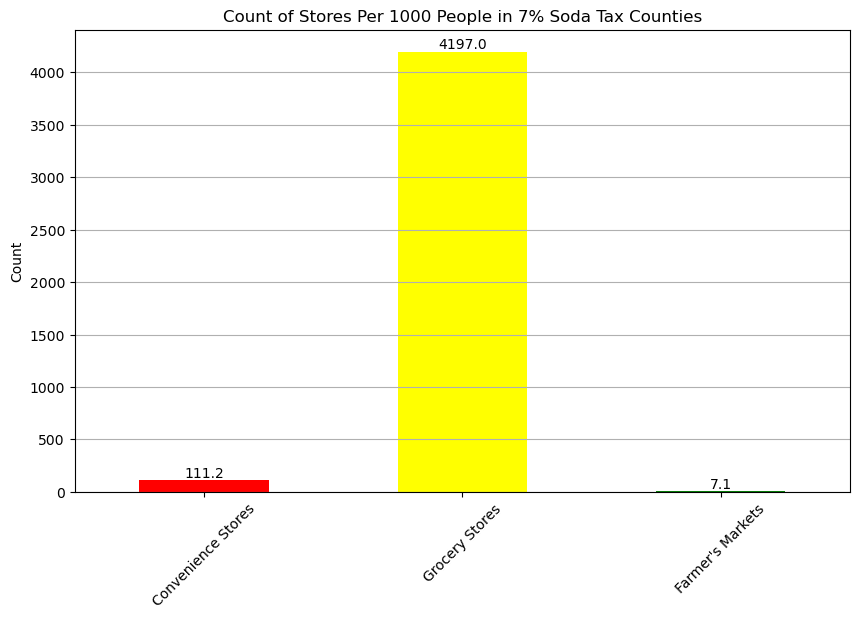

In [66]:
aggregation = soda_tax_7_percent[["CONVSPTH16", "GROC16", "FMRKTPTH18"]].sum()

plt.figure(figsize=(10, 6))
bar_plot = aggregation.plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Count of Stores Per 1000 People in 7% Soda Tax Counties')
plt.ylabel('Count')

bar_plot.set_xticklabels(["Convenience Stores", "Grocery Stores", "Farmer's Markets"], rotation=45)

plt.grid(axis='y')

for i in range(len(aggregation)):
    plt.text(i, aggregation[i], round(aggregation[i], 2), ha='center', va='bottom')

plt.show()

In [67]:
soda_tax_1_percent = final_merge[final_merge['SODATAX_STORES14'] == 1.5]
soda_tax_1_percent

,County & State,FIPS_x,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,SUPERC16,...,FMRKT_BAKED18,PCT_FMRKT_BAKED18,FMRKT_OTHERFOOD18,PCT_FMRKT_OTHERFOOD18,FIPS_y,SODATAX_STORES14,SODATAX_VENDM14,CHIPSTAX_STORES14,CHIPSTAX_VENDM14,FOOD_TAX14
111,"Arkansas, AR",5001,3,3,0.000000,0.158991,0.164699,3.590447,1,1,...,0.0,0.000000,0.0,0.000000,5001,1.5,1.5,1.5,1.5,1.5
112,"Ashley, AR",5003,7,2,-71.428571,0.322983,0.097570,-69.790781,1,1,...,0.0,0.000000,0.0,0.000000,5003,1.5,1.5,1.5,1.5,1.5
113,"Baxter, AR",5005,7,8,14.285714,0.169323,0.194434,14.830130,1,1,...,0.0,0.000000,0.0,0.000000,5005,1.5,1.5,1.5,1.5,1.5
114,"Benton, AR",5007,27,37,37.037037,0.117993,0.143021,21.211014,7,7,...,6.0,75.000000,6.0,75.000000,5007,1.5,1.5,1.5,1.5,1.5
115,"Boone, AR",5009,5,7,40.000000,0.134905,0.188218,39.518163,1,1,...,2.0,66.666664,2.0,66.666664,5009,1.5,1.5,1.5,1.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,"Suffolk, VA",51800,14,14,0.000000,0.165184,0.156785,-5.084328,2,2,...,1.0,50.000000,1.0,50.000000,51800,1.5,5.3,1.5,5.3,1.5
2992,"Virginia Beach, VA",51810,71,77,8.450704,0.160319,0.170579,6.399913,5,8,...,3.0,60.000000,3.0,60.000000,51810,1.5,5.3,1.5,5.3,1.5
2993,"Waynesboro, VA",51820,8,10,25.000000,0.379057,0.458674,21.003807,1,1,...,0.0,0.000000,0.0,0.000000,51820,1.5,5.3,1.5,5.3,1.5
2994,"Williamsburg, VA",51830,4,5,25.000000,0.283366,0.334403,18.010968,0,0,...,1.0,100.000000,1.0,100.000000,51830,1.5,5.3,1.5,5.3,1.5


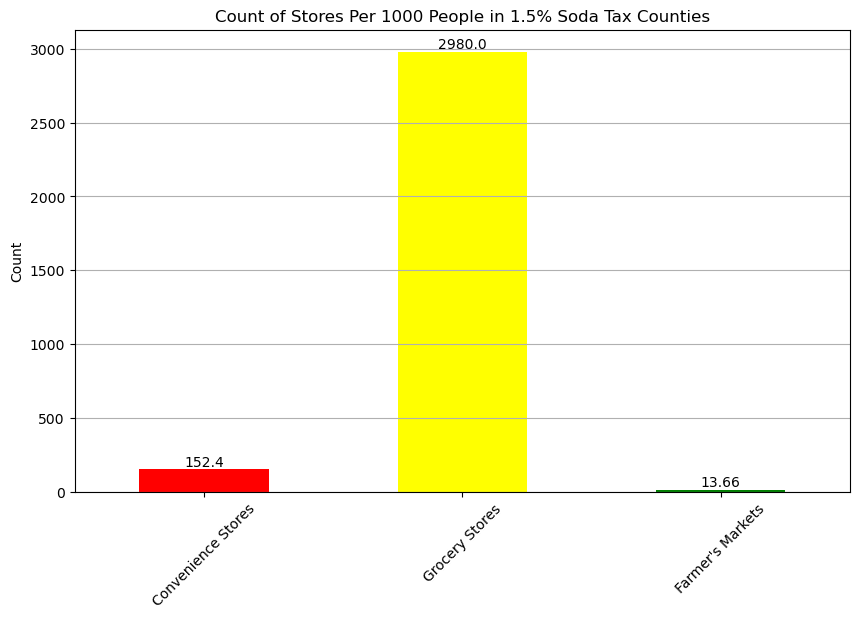

In [70]:
aggregation = soda_tax_1_percent[["CONVSPTH16", "GROC16", "FMRKTPTH18"]].sum()

plt.figure(figsize=(10, 6))
bar_plot = aggregation.plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Count of Stores Per 1000 People in 1.5% Soda Tax Counties')
plt.ylabel('Count')

bar_plot.set_xticklabels(["Convenience Stores", "Grocery Stores", "Farmer's Markets"], rotation=45)

plt.grid(axis='y')

for i in range(len(aggregation)):
    plt.text(i, aggregation[i], round(aggregation[i], 2), ha='center', va='bottom')

plt.show()